# **1. Importing Libraries** #

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,recall_score,precision_score,f1_score,roc_curve,accuracy_score
from sklearn.metrics import roc_auc_score,precision_recall_curve,ConfusionMatrixDisplay,make_scorer

# **2. Loading Dataset** #

In [2]:
# Loading dataset to a pandas' dataframe
zomato_df = pd.read_csv('zomato.csv')
# Displaying first 5 rows of dataset
zomato_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
print(f'The Dataset consists of {zomato_df.shape[0]} rows and {zomato_df.shape[1]} columns.')

The Dataset consists of 51717 rows and 17 columns.


## **2.1. Dataset overview** ##
The Zomato dataset contains information about some of restaurants in Bengaluru, which is city that is famous of have a huge number of restaurants more than 12,00 restaurants with restaurants serving dishes from all over the world.<br>
The Zomato dataset can be used to analyze the demographics of a location, find similarities between neighborhoods, and get reviews of restaurants.
#### **The following table shows the features contained in the dataset and their description** ####
|| Features | Description |
| ---| --- | --- |
|1|url | zomato url for the restaurants
|2|address | complete location of the restaurant
|3|name | name of the restaurant
|4|online_order | whether restaurant accepts online order
|5|book_table | whether restaurant provides option for booking table
|6|rate | restaurants rating on zomato website
|7|votes | number of individual who voted for restaurants
|8|phone | contact details of the restaurant
|9|location | area where restaurant is situated
|10|rest_type | Type of restaurants (Categorical value)
|11|dish_liked | what are all dishes of the restaurant that people liked
|12|cuisines | cuisines offered by the restaurant
|13|approx_cost(for two people) | average cost for two people
|14|review_list | reviews of the restaurant on zomato website
|15|menu_item | menu items available in the restaurant
|16|listed_in(type) | type of the restaurant
|17|listed_in(city) | locality of the restaurant position

## **2.2. Workflow Goals** ##
**1. Data Exploring and Wrangling.** Create bussiness questions and answer it through visualizations and numbers after cleaning the data. <br>
**2. Classifying.** Build a classification model which will classify the success of the restaurant or not, But This classifier will not work on a new restaurants it will only work on restaurants that previously rated and we have info about those ratings but we don't know if this restaurant is successful or not.<br>
**3. Correlating.** Determine which is the most factors that affect rate of restaurants and their ability to be successful or not.<br>
**4. Evaluating.** Evaluate weather the model is performing well or not using appropriate metrics.<br>

# **3. Exploratory Data Analysis** #

## **3.1. Creating subset of dataset to work with** ##

In [4]:
# Dataset info
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

According to te listed columns above, we see that there are some columns that we won't use in our analysis which are **url**, **phone**,**menu_item**, **address**, **dish_liked**, **listed_in(city)** and **reviews_list** either because **irrelevancy** or **high number of missing values** which will be not reasonable to impute using methods, So **It would be better to create a subset of our dataset without those columns**.<br>

In [5]:
# Creating subset of the dataset 
df = zomato_df.drop(['url','address','phone','location','dish_liked','reviews_list','menu_item'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [6]:
# Rename columns to more significant names
df.rename(columns={"online_order": "online_ordering?", "book_table": "table_bookings?", "rate": "ratings",
                   'listed_in(type)':'type','approx_cost(for two people)':'cost_per_two','listed_in(city)':'neighborhood'},inplace=True)

## **3.2. Subset Dataset overview** ##

In [7]:
# Dataset shape
print(f'The subset dataset consists of {df.shape[0]} rows and {df.shape[1]} columns.')

The subset dataset consists of 51717 rows and 10 columns.


In [8]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              51717 non-null  object
 1   online_ordering?  51717 non-null  object
 2   table_bookings?   51717 non-null  object
 3   ratings           43942 non-null  object
 4   votes             51717 non-null  int64 
 5   rest_type         51490 non-null  object
 6   cuisines          51672 non-null  object
 7   cost_per_two      51371 non-null  object
 8   type              51717 non-null  object
 9   neighborhood      51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


#### The Following columns have missing values that we should fill: ####
1. **rating**
2. **neighborhood** 
3. **rest_type**
4. **cuisines**
6. **cost_per_two**

## **3.3. Data Wrangling** ##

### **3.3.1 Drop Duplicates** ###

In [9]:
# Print the number of duplicated rows in the dataset before dropping.
# We use the `sum` function to count the duplicated rows.
print(f'There are {sum(df.duplicated())} duplicated rows in the dataset before dropping.')

# Drop the duplicated rows in the DataFrame.
# The `inplace=True` parameter ensures that the DataFrame is modified in place.
df.drop_duplicates(inplace=True)

# Print the number of duplicated rows in the dataset after dropping.
# This helps us verify that the duplicates have been successfully removed.
print(f'There are {sum(df.duplicated())} duplicated rows in the dataset after dropping.')

There are 124 duplicated rows in the dataset before dropping.
There are 0 duplicated rows in the dataset after dropping.


### **3.3.2 Dealing with Null values** ###

In [10]:
# Print a header for displaying the percentage of null values in each column
print('Percentage of Null values in every column')

# Print a separator line for clarity
print('----------------------------------------------')

# Calculate and print the percentage of null values in each column
# by dividing the count of null values by the total number of rows (len(df))
# and then multiplying by 100 to get the percentage.
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)

Percentage of Null values in every column
----------------------------------------------
name                 0.000000
online_ordering?     0.000000
table_bookings?      0.000000
ratings             15.002035
votes                0.000000
rest_type            0.439982
cuisines             0.087221
cost_per_two         0.666757
type                 0.000000
neighborhood         0.000000
dtype: float64


According to those percentages, It's ok to just **drop** the rows with **null values** at **cuisines, rest_type, and cost_per_two** columns as their percentage is very small with respect to the dataset size. while for **ratings** column we have to fix it's values first before removing any.

In [11]:
# Dropping rows with missing (null) values in specific columns:
# We are removing rows where the 'cuisines', 'rest_type', or 'cost_per_two' columns have missing values.
# This operation is performed in-place, meaning the DataFrame 'df' is modified directly.
df.dropna(subset=['cuisines', 'rest_type', 'cost_per_two'], inplace=True)

### **3.3.3 Cost_per_two Column** ###

In [12]:
def clean_cost(value):
    '''
    This function takes a value (supposed to be numeric but is a string with commas, e.g., '10,000'),
    removes the commas, and returns the number as a floating-point (float) type.

    Parameters:
    value (str or numeric): The value to be cleaned, which may contain commas.

    Returns:
    float or np.nan: The cleaned numeric value as a float. Returns np.nan if the input is 'nan'.
    '''
    # Convert the input to a string to handle various data types
    value = str(value)

    # Check if the value contains commas
    if ',' in value:
        # Remove the commas and convert to float
        new_value = value.replace(',', '')
        return float(new_value)
    # Check if the value is 'nan' (a string representation of NaN)
    elif value == 'nan':
        return np.nan
    else:
        # Convert the value to float (assuming it's already in a numeric format)
        return float(value)

In [13]:
# Apply the clean_cost function to the 'cost_per_two' column
df['cost_per_two'] = df['cost_per_two'].apply(clean_cost)

### **3.3.4 Rating Column** ###

In [14]:
#Listing the unique values in the rating column
df['ratings'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

To deal with null values in ratings columns, It's better to first **remove '/5'** from the entries kepping it only the rating as float number. Also we have **replace** all the values that indicates there is no rating such as **'NEW' and '-'** with nan value.  

In [15]:
# Cleaning the 'ratings' column by replacing specific values with NaN.
# Iterate through a list of values ['nan', '-', 'NaN'] and replace them with NaN in the 'ratings' column.
for i in ['nan', '-', 'NaN']:
    df['ratings'].replace(i, np.nan, inplace=True)

# Replace 'NEW' with NaN in the 'ratings' column.
df['ratings'].replace('NEW', np.nan, inplace=True)


# Define a function named 'remove_5' that takes a value as input.
def remove_5(value):
    # Check if the input value is of type string.
    if type(value) == str:
        # Split the string by '/' and keep only the part before the first '/'.
        value_new = value.split('/')[0]
        # Return the modified value.
        return value_new
    # If the input value is not a string, return it unchanged.
    return value

# Applying the 'remove_5' function to the 'ratings' column to remove occurrences of '5'
df['ratings'] = df['ratings'].apply(remove_5)

# Converting the data type of the 'ratings' column to float
df['ratings'] = df['ratings'].astype('float64')

# Printing the unique values in the 'ratings' column
df['ratings'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [16]:
# dropping rows with null values at 'ratings' column
df.dropna(subset=['ratings'], inplace=True)

In [17]:
print(f'Final Shape of the Dataset is {df.shape[0]} rows and {df.shape[1]} columns.')

Final Shape of the Dataset is 41190 rows and 10 columns.


In [18]:
# Display information about the DataFrame, including data types, non-null counts, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41190 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              41190 non-null  object 
 1   online_ordering?  41190 non-null  object 
 2   table_bookings?   41190 non-null  object 
 3   ratings           41190 non-null  float64
 4   votes             41190 non-null  int64  
 5   rest_type         41190 non-null  object 
 6   cuisines          41190 non-null  object 
 7   cost_per_two      41190 non-null  float64
 8   type              41190 non-null  object 
 9   neighborhood      41190 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.5+ MB


In [19]:
# Generate summary statistics for the DataFrame using the describe() method.
# This provides statistical information such as count, mean, std (standard deviation),
# min (minimum value), 25%, 50% (median), 75%, and max (maximum value) for each numerical column.
df.describe()

,ratings,votes,cost_per_two
count,41190.000000,41190.000000,41190.000000
mean,3.701731,352.066715,603.545909
std,0.439929,883.461453,464.651174
min,1.800000,0.000000,40.000000
25%,3.400000,21.000000,300.000000
50%,3.700000,73.000000,500.000000
75%,4.000000,277.000000,750.000000
max,4.900000,16832.000000,6000.000000


## **3.4. Answering Bussiness Questions** ##

Prior to proceeding with the analysis process, we will define the business questions that we aim to answer with this analysis:<br>
**1. What are the most Liked cuisines in Bangalore?** <br>
**2. What are the most Liked restaurant types in Bangalore?** <br>
**3. What is the Average price per two persons based on type of service?** <br>
**4. What Average rating and most common rating?** <br>
**5. What percentage of restaurants have online ordering option in Bangalore?** <br>
**6. What percentage of restaurants offer table booking option in Bangalore?** <br>
**7. What are the Top 10 popular neighborhoods for restaurants in Bangalore?** <br>
**8. Does the restaurant's location affect its rating?** <br>
**9. What is the correlation between the average cost per two persons and the restaurant's rating?** <br>
**10. What is the correlation between the number of reviews and the restaurant's rating?** <br>
**11. Do restaurants with online ordering have higher ratings than those without?** <br>
**12. Do restaurants with bookings option have higher ratings than those without?** <br>
**13. What are the top 10 highest-rated restaurants and thier average cost?** <br>

### Plotting Functions Definations ###

In [20]:
def bar_plot_annot(dataset, x_=None, y_=None, barh=False, color_palette=None, x_shift=0, y_shift=0,
                   figsize_=(10, 6), title_=None, xlabel_=None, ylabel_=None, rot_=0, annotate=False, annot_is_perc=False, univariate=False):
    '''
    Create a bar plot with optional annotations.

    Parameters:
    - dataset: DataFrame containing the data to be plotted.
    - x_: Name of the column to be used for the x-axis (for horizontal bar plots) or y-axis (for vertical bar plots).
    - y_: Name of the column to be used for the y-axis (for horizontal bar plots) or x-axis (for vertical bar plots).
    - barh: If True, create a horizontal bar plot; otherwise, create a vertical bar plot.
    - color_palette: A list of colors to be used for coloring the bars.
    - x_shift: Horizontal shift for annotations.
    - y_shift: Vertical shift for annotations.
    - figsize_: Tuple specifying the size of the figure.
    - title_: Title for the plot.
    - xlabel_: Label for the x-axis.
    - ylabel_: Label for the y-axis.
    - rot_: Rotation angle for x-axis labels.
    - annotate: If True, annotate bars with their values.
    - annot_is_perc: If True, treat annotations as percentages.
    - univariate: If True, create a univariate bar plot based on value counts.

    Returns:
    - None

    Usage example:
    bar_plot_annot(data, x_='Category', y_='Value', barh=False, color_palette='Set1', figsize_=(10, 6), title_='Bar Plot Example', xlabel_='Categories', ylabel_='Values', rot_=0, annotate=True, annot_is_perc=False, univariate=False)
    '''
    # Setting figure size
    plt.figure(figsize=figsize_)

    if univariate == True:
        if y_ == None:
            # Create a univariate bar plot for x_
            ax = sns.barplot(x=dataset[x_].value_counts().index,
                             y=(dataset[x_].value_counts() / dataset[x_].count()) * 100,
                             edgecolor='k', order=dataset[x_].value_counts().index, palette=color_palette)
        else:
            # Create a univariate bar plot for y_
            ax = sns.barplot(y=dataset[x_].value_counts().index,
                             x=(dataset[x_].value_counts() / dataset[x_].count()) * 100,
                             edgecolor='k', order=dataset[x_].value_counts().index, palette=color_palette)
    else:
        # Create a bar plot with x_ and y_
        ax = sns.barplot(data=dataset, x=x_, y=y_, edgecolor='black', ci=None, palette=color_palette)

    if annotate == True:
        # Annotate the bars
        if barh == True:
            bars_height = [bar.get_width() / 2 for bar in ax.patches]
            bars_x = [bar.get_x() + bar.get_width() + x_shift for bar in ax.patches]
            for i in range(len(bars_height)):
                if annot_is_perc == True:
                    plt.text(x=bars_x[i] / 2, y=i - y_shift, s=f'{bars_x[i]}%')
                else:
                    plt.text(x=bars_x[i] / 2, y=i - y_shift, s=f'{bars_x[i]}')
        else:
            bars_height = [bar.get_height().round(2) for bar in ax.patches]
            bars_width = [bar.get_width() / 2 for bar in ax.patches]
            for i in range(len(bars_height)):
                if annot_is_perc == True:
                    plt.text(x=i - x_shift, y=bars_height[i] + y_shift, s=f'{bars_height[i]}%')
                else:
                    plt.text(x=i - x_shift, y=bars_height[i] + y_shift, s=f'{bars_height[i]}')

    # Plot Setting
    plt.title(title_)
    plt.xlabel(xlabel_)
    plt.ylabel(ylabel_)
    plt.xticks(rotation=rot_)
    plt.tight_layout()

    # Show the plot
    plt.show()


In [21]:
def donut_chart(df, feature, labels, colors, title, figsize, add_text_inside=False, Text_1=None, x_text=0, y_text=0):
    """
    Create a donut chart with optional text inside.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - feature (str): The column name in the DataFrame to create the chart for.
    - labels (list): Labels for the two segments of the donut chart.
    - colors (list): Colors for the two segments of the donut chart.
    - title (str): The title of the donut chart.
    - figsize (tuple): The size of the figure (e.g., (10, 6)).
    - add_text_inside (bool): Whether to add text inside the donut.
    - Text_1 (str): The text to add inside the donut (if add_text_inside is True).
    - x_text (float): X-coordinate for positioning the text inside the donut.
    - y_text (float): Y-coordinate for positioning the text inside the donut.

    Returns:
    - None (Displays the donut chart).
    """

    # Create a donut plot
    fig, ax = plt.subplots(figsize=figsize)
    bx = plt.pie([df[feature].value_counts()[0], df[feature].value_counts()[1]],
                 labels=labels, autopct='%1.1f%%', labeldistance=1.05,
                 pctdistance=0.5, startangle=90, wedgeprops=dict(width=0.4, edgecolor='w'), colors=colors)

    # Draw a circle at the center to make it a donut plot
    center_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig.gca().add_artist(center_circle)

    if add_text_inside:
        # Add text inside the donut
        plt.text(x_text, y_text, Text_1, ha='center', va='center', fontsize=12, fontweight='bold')

    plt.title(title)
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax.axis('equal')
    # Show the plot
    plt.show()

### **3.4.1. What are the most Liked cuisines in Bangalore?** ###

In [22]:
def split_on_commas(input_string):
    """
    Splits a given input string into a list of substrings using commas and optional spaces as delimiters.

    Args:
        input_string (str): The input string to be split.

    Returns:
        list: A list of substrings obtained by splitting the input string.
    """
    return input_string.split(', ')

In [23]:
# Creates a new coulmns contains cuisines for evey restaurants stored in a list
df['Count_Cuisines_list'] = df['cuisines'].apply(split_on_commas)
all_cuisines = []
#Extend every cuisine list for every restaurant in one list
for cuisines in df['Count_Cuisines_list']:
    all_cuisines.extend(cuisines)
#Count Occurance Number for every cuisine
cuisine_counts = pd.Series(all_cuisines).value_counts()
#Creating a Data Frame with the top 7 popular cuisines in bangalore
top_7_cuisines = pd.DataFrame(data = pd.Series(all_cuisines).value_counts()).reset_index()
top_7_cuisines.rename(columns={'index':'Cuisine','count':'Restaurants_Serving'},inplace=True)

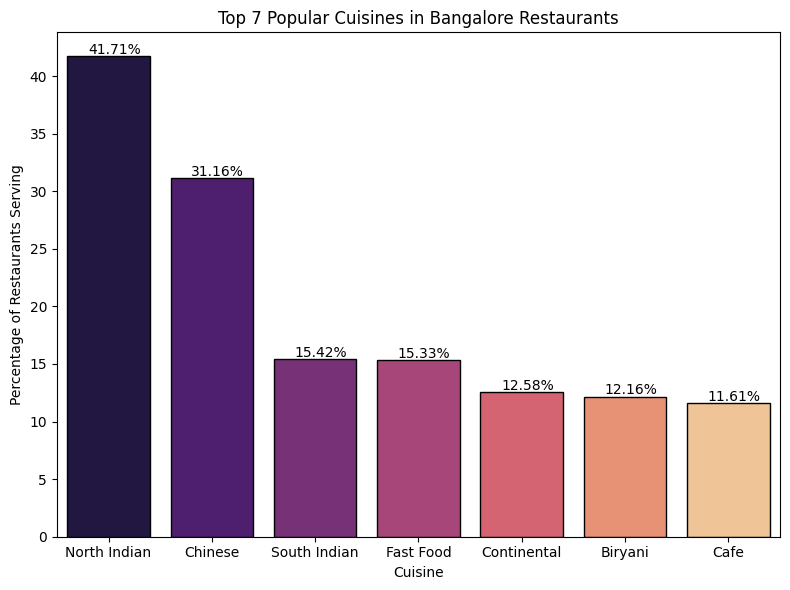

In [24]:
bar_plot_annot(dataset=top_7_cuisines.head(7),x_='Cuisine',y_=top_7_cuisines['Restaurants_Serving']/len(df)*100,barh=False,color_palette='magma',
               x_shift=0.2,y_shift=0.2,figsize_=(8, 6),title_='Top 7 Popular Cuisines in Bangalore Restaurants',xlabel_='Cuisine',ylabel_='Percentage of Restaurants Serving',
               rot_=0,annotate=True,annot_is_perc=True,univariate=False)

The most popular cusines in Bangalore are **North Indian** as it's avaiable in more than **41%** of bangalore's restaurants, followed by **Chinese** with more than **31%** and then the **South Indian**.

### **3.4.2. What are the most Liked restaurant types in Bangalore?** ###

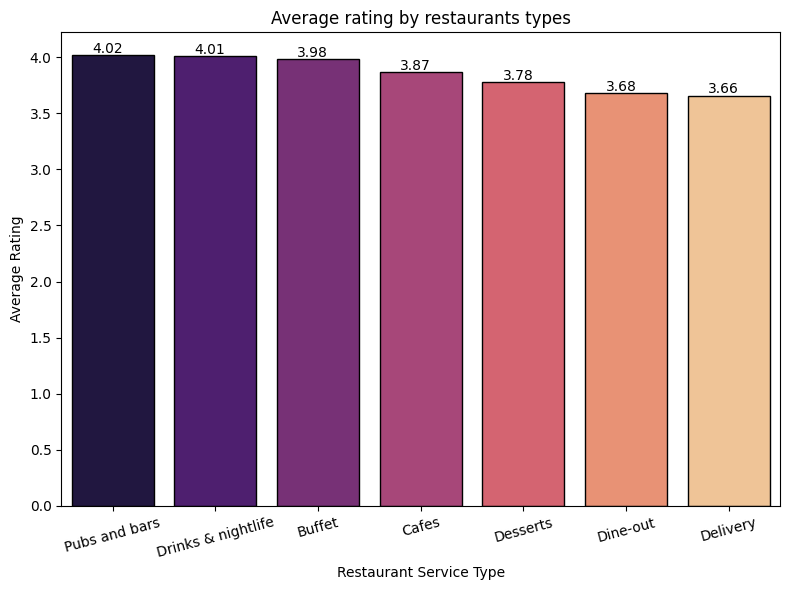

In [25]:
# Getting Mean rating for every restaurnat type in bangalore
Fav_Cus = df.groupby(['type'])['ratings'].mean().round(3).reset_index().sort_values(by='ratings',ascending=False)
bar_plot_annot(dataset=Fav_Cus,x_='type',y_='ratings',barh=False,color_palette='magma',x_shift=0.2,y_shift=0.02,figsize_=(8, 6),
                title_='Average rating by restaurants types',xlabel_='Restaurant Service Type',ylabel_='Average Rating',rot_=15,
               annotate=True,annot_is_perc=False,univariate=False)

As Shown the highest Restaurant Ratings is given for **Nightlife** restaurants such as **Pubs and Bars** with average ratings **4.02** followed by the restaurants that offers **Buffet** which maybe more **luxurious** restaurants with average ratings of **3.98**.

### **3.4.3. What is the Average price per two persons based on type of service?** ###

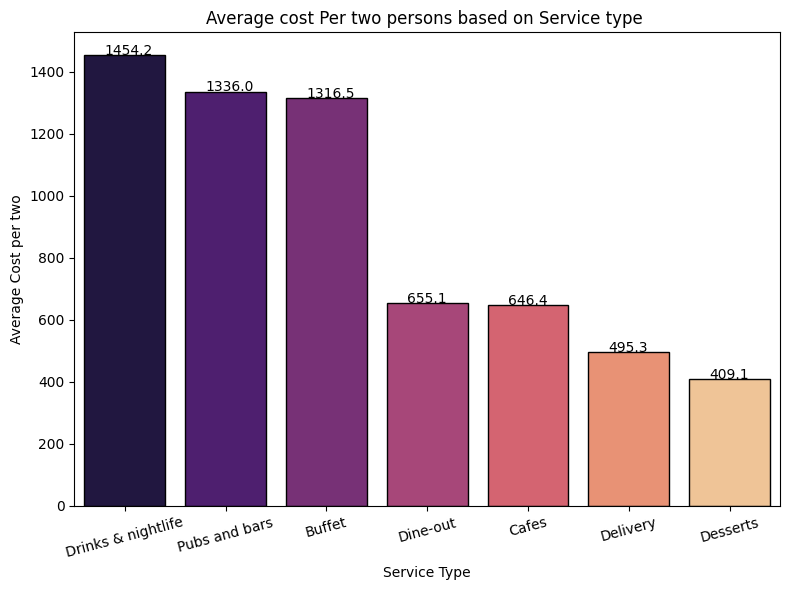

In [26]:
# Group the DataFrame 'df' by the 'type' column and calculate the mean of the 'cost_per_two' column for each group.
# Then, round the mean values to one decimal place.
# Reset the index of the resulting DataFrame to make 'type' a regular column.
# Finally, sort the DataFrame by the 'cost_per_two' column in descending order and store it in the 'cost_type' variable.
cost_type = df.groupby('type')['cost_per_two'].mean().round(1).reset_index().sort_values(by='cost_per_two',ascending=False)
bar_plot_annot(dataset=cost_type,x_='type',y_='cost_per_two',barh=False,color_palette='magma',x_shift=0.2,y_shift=0.2,figsize_=(8, 6),
                title_='Average cost Per two persons based on Service type ',xlabel_='Service Type',ylabel_='Average Cost per two',rot_=15,
               annotate=True,annot_is_perc=False,univariate=False)

we could also see that **Nightlife** restaurants such as **Pubs and Bars** have the highest average cost for two persons for about **1330 to 1454 INR** followed by the restaurants that offers **Buffet** have the  average cost for two persons for about **1300 INR** then other types of restaurants with average cost **650 to 400 INR**.

#### **3.4.4. What Average rating and most common rating?** ###

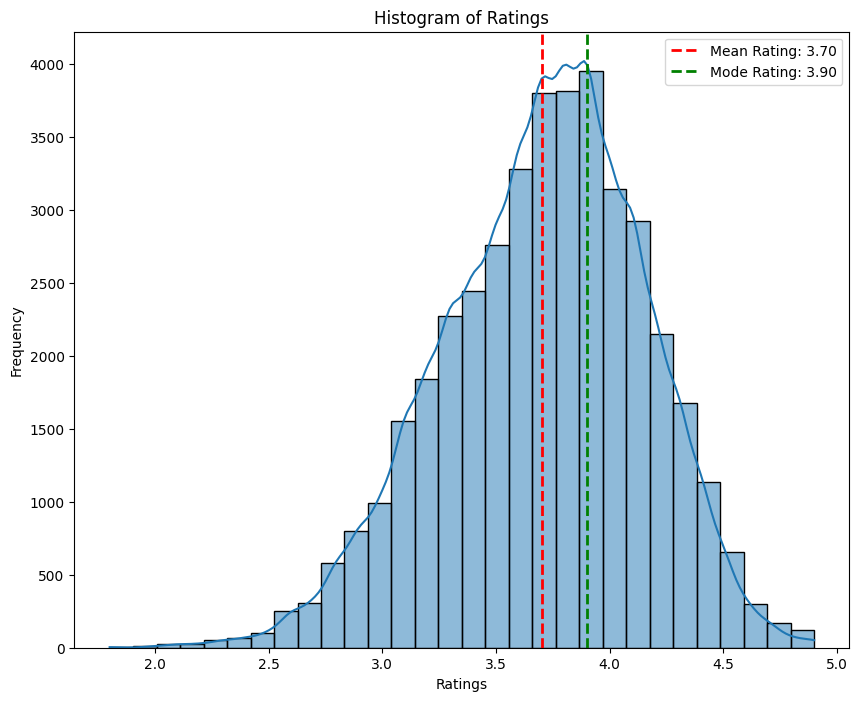

In [27]:
# Create a figure with a specific size
plt.figure(figsize=(10, 8))
# Create a histogram of the 'ratings' column with a kernel density estimate (KDE)
sns.histplot(data=df, x='ratings', kde=True, bins=30)
# Calculate the mean rating
mean_rating = df['ratings'].mean()
# Add a vertical line for the mean rating with a red dashed line
plt.axvline(mean_rating, color='red', linestyle='dashed', linewidth=2, label=f'Mean Rating: {mean_rating:.2f}')
# Calculate the mode rating
mode_rating = df['ratings'].mode().iloc[0]
# Add a vertical line for the mode rating with a green dashed line
plt.axvline(mode_rating, color='green', linestyle='dashed', linewidth=2, label=f'Mode Rating: {mode_rating:.2f}')
# Label the x and y axes
plt.xlabel('Ratings')
plt.ylabel('Frequency')
# Set a title for the histogram
plt.title('Histogram of Ratings')
# Display a legend with labels for the vertical lines
plt.legend()
# Show the plot
plt.show()

We could see that the ratings are nearly normally distributed with average overall rating equal **3.7** / 5 while the most common one is **3.9** /5, which suggests that the restaurants in bangalore is good in general.

### **3.4.5. What percentage of restaurants have online ordering option in Bangalore?** ###

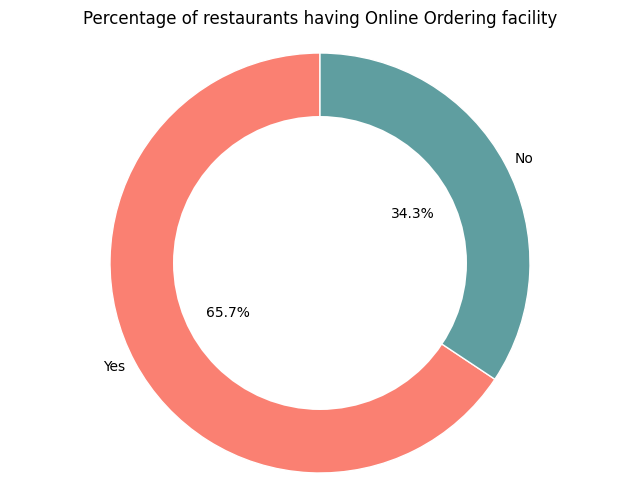

In [28]:
donut_chart(df,'online_ordering?',df['online_ordering?'].value_counts().index,
            ['salmon','cadetblue'],'Percentage of restaurants having Online Ordering facility',(8, 6))

### **3.4.6. What percentage of restaurants offer table booking option in Bangalore?** ###

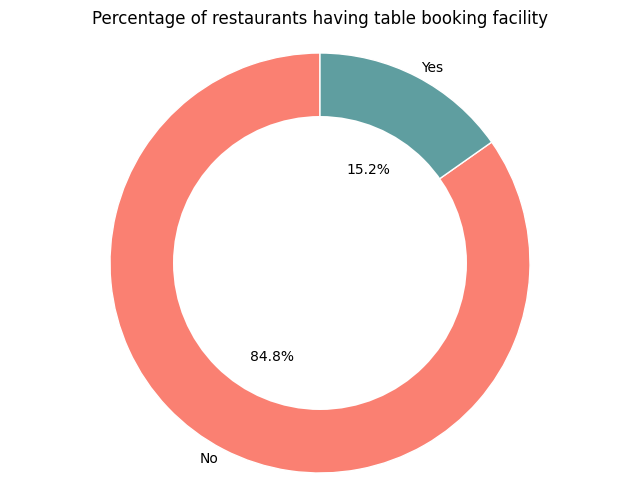

In [29]:
donut_chart(df,'table_bookings?',df['table_bookings?'].value_counts().index,['salmon','cadetblue'],'Percentage of restaurants having table booking facility',(8, 6))

**Most** Restaurnats in Bengaluru have facility to **order online** , but a **very small** proportion have the facility to **book table** before you go to restaurants.

### **3.4.7. What are the Top 10 popular neighborhoods for restaurants in Bangalore?** #####

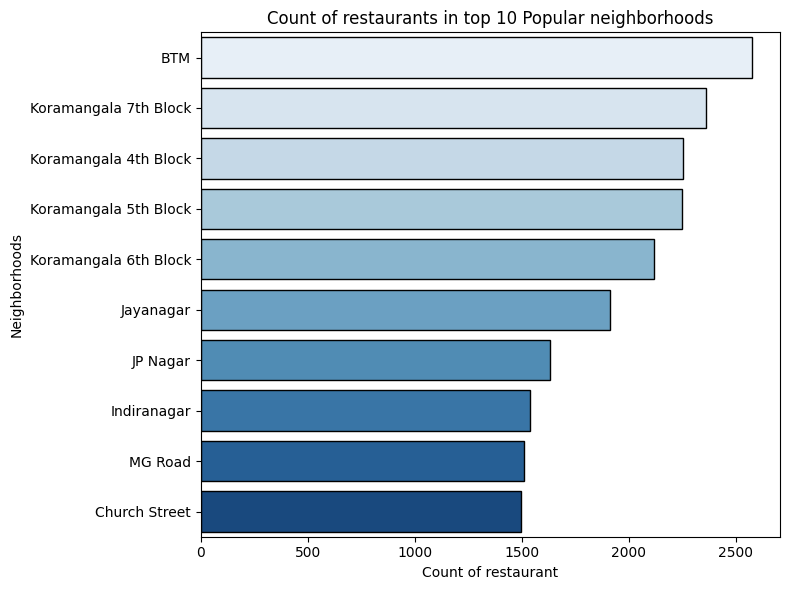

In [30]:
# Create a DataFrame to count the occurrences of each neighborhood in the 'neighborhood' column
# and select the top 10 neighborhoods with the highest counts.
# Count the occurrences of each neighborhood and reset the index to create a DataFrame.
# Select the top 10 neighborhoods with the highest counts by using the .head(10) method.
neighborhood_count = pd.DataFrame(data=df['neighborhood'].value_counts().reset_index().head(10))
bar_plot_annot(
    dataset=neighborhood_count, x_='count', y_='neighborhood',barh=True,color_palette='Blues', x_shift=None, y_shift=None, figsize_=(8, 6),
    title_='Count of restaurants in top 10 Popular neighborhoods', xlabel_='Count of restaurant', ylabel_='Neighborhoods', rot_=0,
    annotate=False, annot_is_perc=False, univariate=False
)

**BTM** is the most popular neighborhood for restaurants having about more than **2200** restaurants followed by **Koramangala Blocks** and **Jayannagar**.

### **3.4.8. Does the restaurant's location affect its rating?** ###

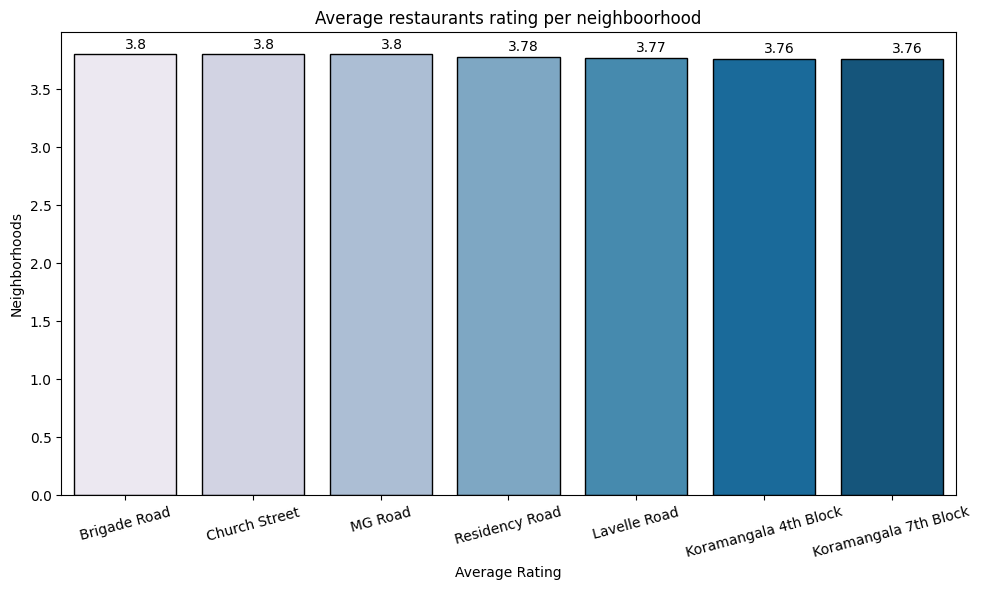

In [37]:
# Group the DataFrame 'df' by the 'neighborhood' column and calculate the mean 'ratings' for each group.
# Round the mean ratings to 2 decimal places for readability.
# Reset the index to make the neighborhood names a regular column instead of an index.
# Sort the grouped data by 'ratings' in descending order to find the neighborhoods with the highest ratings.
# Select the top 15 neighborhoods with the highest average ratings.
neighborhood_grp = df.groupby('neighborhood')['ratings'].mean().round(2).reset_index().sort_values(by='ratings',ascending=False).head(7)
bar_plot_annot(dataset=neighborhood_grp,x_='neighborhood',y_='ratings',barh=False,color_palette='PuBu',x_shift=0,y_shift=0.05,figsize_=(10, 6),
            title_='Average restaurants rating per neighboorhood',xlabel_='Average Rating',ylabel_='Neighborhoods',rot_=15,
            annotate=True,annot_is_perc=False,univariate=False)

The top three neighborhoods with highest restaurants ratings are **Brigade Road, Church Street, MG Road**.

### **3.4.9. What is the correlation between the average cost per two persons and the restaurant's rating?** ###

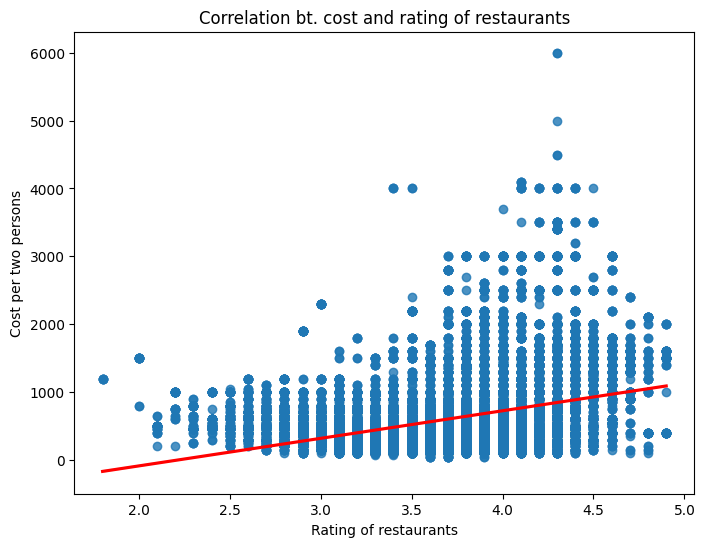

In [38]:
plt.figure(figsize=(8,6))
sns.regplot(data=df,x='ratings',y='cost_per_two',line_kws={'color':'r'})
plt.xlabel('Rating of restaurants')
plt.ylabel('Cost per two persons')
plt.title('Correlation bt. cost and rating of restaurants')
plt.show()

From The Scatterplot and the Regression Line we can that Cost per two persons in a restaurant doesn't highly corelated with rating of the restaurant as long as rating below 3.0 but when the rating increases over that the cost increases also reaching too high cost in highly luxurious restaurants up to **6000 INR** per two persons.

### **3.4.10. What is the correlation between the number of reviews and the restaurant's rating?** ###

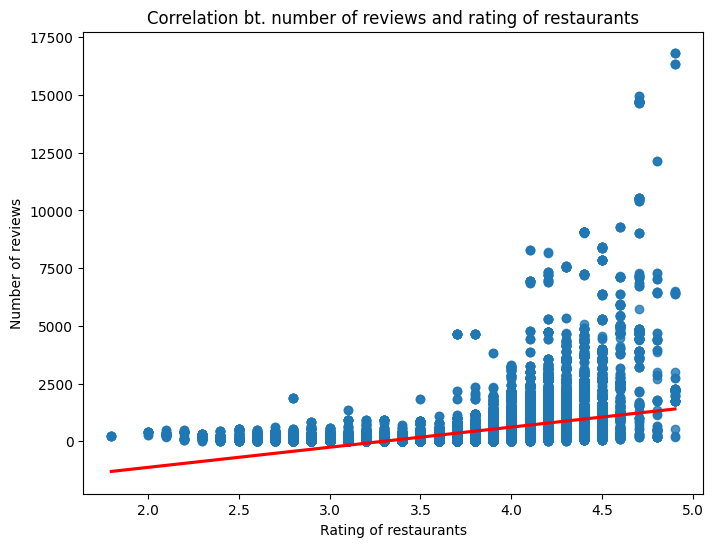

In [39]:
plt.figure(figsize=(8,6))
sns.regplot(data=df,x='ratings',y='votes',line_kws={'color':'r'})
plt.xlabel('Rating of restaurants')
plt.ylabel('Number of reviews')
plt.title('Correlation bt. number of reviews and rating of restaurants')
plt.show()

The Rating of restaurants is highly corelated with the number of reviews done on this restaurant which is very reasonable.

### **3.4.11. Do restaurants with online ordering have higher ratings than those without?** ###

In [40]:
online_order_grp = df.groupby(['online_ordering?'])['ratings'].mean().round(3).reset_index().sort_values(by='ratings',ascending=False)
online_order_grp

,online_ordering?,ratings
1,Yes,3.724
0,No,3.660


### **3.4.12. Do restaurants with bookings option have higher ratings than those without?** ###

In [41]:
table_booking_grp = df.groupby(['table_bookings?'])['ratings'].mean().round(3).reset_index().sort_values(by='ratings',ascending=False)
table_booking_grp

,table_bookings?,ratings
1,Yes,4.143
0,No,3.622


Restaurants that have with **table bookings facility** have **higher average rating** than ones who doesn't have, same for the **online ordering facility** which gives the restaurants that have this facility **higher average rating** than ones who doesn't have.

### **3.4.13. What are the top 10 highest-rated restaurants and thier average cost and Rating?** ###

In [42]:
# Remove special characters and symbols from the 'name' column
# Using a lambda function and regular expression substitution
df['name'] = df['name'].apply(lambda x: re.sub(r"[^a-zA-Z0-9 ]","", x))

In [43]:
# Calculate the average cost per two persons for each restaurant and round to two decimal places
expensive_10 = df.groupby('name')['cost_per_two'].mean().round(2).reset_index().sort_values(by='cost_per_two', ascending=False).reset_index(drop=True)
# Calculate the average ratings for each restaurant and round to two decimal places
best_10 = df.groupby('name')['ratings'].mean().round(2).reset_index().sort_values(by='ratings', ascending=False).reset_index(drop=True)
# Merge the dataframes containing the top 10 highest-rated restaurants and the top 10 most expensive restaurants
# based on cost per two persons, and sort the result by ratings in descending order
Cost_rating_best_10 = best_10.merge(right=expensive_10, on='name').sort_values(by='ratings', ascending=False).head(10)

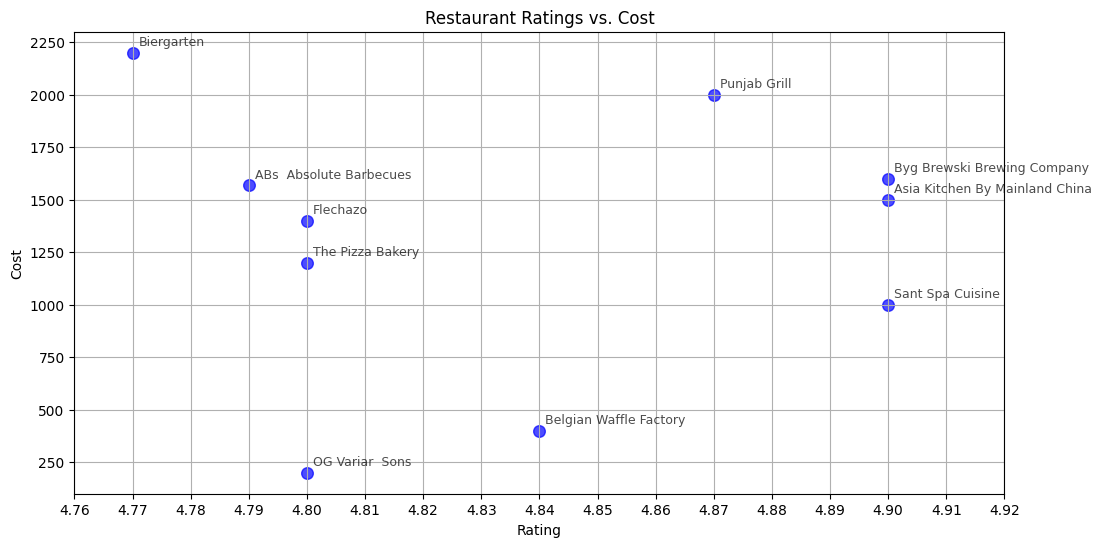

In [44]:
# Assuming you have a DataFrame 'df' with columns 'RestaurantName', 'Rating', and 'Cost'
plt.figure(figsize=(12, 6))
plt.scatter(Cost_rating_best_10['ratings'], Cost_rating_best_10['cost_per_two'], s=70, c='blue', alpha=0.7)

# Annotate each marker with the restaurant name
for i, row in Cost_rating_best_10.iterrows():
    plt.annotate(row['name'], (row['ratings']+0.001, row['cost_per_two']+35), fontsize=9, alpha=0.7)

plt.xlabel('Rating')
plt.ylabel('Cost')
plt.title('Restaurant Ratings vs. Cost')
plt.grid(True)
plt.xticks(ticks=np.arange(4.76,4.92,0.01))
plt.show()

# **4. Machine Learning Modeling** #

## **4.1. Data Preparation** ##

### **4.1.1 Outliers Handling** ###

In [45]:
def remove_outliers_iqr(df, column_name):
    """
    Remove outliers from a DataFrame column using the Interquartile Range (IQR) method.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column from which to remove outliers.

    Returns:
    DataFrame: A new DataFrame with outliers removed.
    """

    # Calculate the IQR for the specified column
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to remove outliers
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return filtered_df

In [46]:
df = remove_outliers_iqr(df,'cost_per_two')

In [47]:
df.describe()

,ratings,votes,cost_per_two
count,38536.000000,38536.000000,38536.000000
mean,3.670420,290.389791,513.190419
std,0.428124,736.377081,288.805064
min,1.800000,0.000000,40.000000
25%,3.400000,19.000000,300.000000
50%,3.700000,66.000000,450.000000
75%,4.000000,231.000000,650.000000
max,4.900000,14726.000000,1400.000000


### **4.1.2 Feature Engineering** ###

#### **4.1.2.1 Neighborhood column** ####

In [48]:
def Top_n_either_value(df, column_name, top_values_count, new_value='Other'):
    """
    Generalize a DataFrame column by keeping the top N most frequent values and replacing the rest with a new value.

    Parameters:
        df (DataFrame): The DataFrame containing the column to be generalized.
        column_name (str): The name of the column to be generalized.
        top_values_count (int): The number of top values to keep.
        new_value (str): The value to replace less frequent values with (default is 'Other').

    Returns:
        DataFrame: The DataFrame with the column generalized.
    """
    value_counts = df[column_name].value_counts()
    top_values = value_counts.index[:top_values_count]
    df[column_name] = df[column_name].apply(lambda x: x if x in top_values else new_value)
    return df

In [49]:
df = Top_n_either_value(df, 'neighborhood', 10)

#### **4.1.2.1 Creating Number of cusines column** ####

In [50]:
def count_list(input_list):
    """
    Count the number of elements in a list.

    Parameters:
    input_list (list): The input list to count elements from.

    Returns:
    int: The count of elements in the list.
    """
    return len(input_list)

In [51]:
# Add a new column 'cuisines_count' to the DataFrame 'df'
# The 'Count_Cuisines_list' column contains lists, and we want to count the number of items in each list.
# We apply the 'count_list' function to each element in the 'Count_Cuisines_list' column.
df['cuisines_count'] = df['Count_Cuisines_list'].apply(count_list)

#### **4.1.2.2 Creating Number of service types column** ####

In [52]:
# Split the 'rest_type' column using commas and store the resulting list in a new column.
df['Count_service_list'] = df['rest_type'].apply(split_on_commas)
# Count the number of items in the 'Count_service_list' and store the count in a new column.
df['service_type_count'] = df['Count_service_list'].apply(count_list)

#### **4.1.2.3 Encoding Categorical Features** ####

In [53]:
LE = LabelEncoder()

In [54]:
# List of categorical features to encode
features_to_encode = ['online_ordering?', 'table_bookings?', 'type', 'neighborhood']

# Loop through each feature for label encoding
for feature in features_to_encode:
    # Apply LabelEncoder to the current feature in the DataFrame
    df[feature] = LE.fit_transform(df[feature])
    
    # Print a message indicating which feature is being encoded
    print(f'Encoding feature: {feature}')
    
    # Print the mapping of encoded values to their original labels
    for i in range(0, len(LE.classes_)):
        print(f'{i} -----> {LE.classes_[i]}')
    
    # Print a separator to distinguish between different features
    print('***************************************************************')

Encoding feature: online_ordering?
0 -----> No
1 -----> Yes
***************************************************************
Encoding feature: table_bookings?
0 -----> No
1 -----> Yes
***************************************************************
Encoding feature: type
0 -----> Buffet
1 -----> Cafes
2 -----> Delivery
3 -----> Desserts
4 -----> Dine-out
5 -----> Drinks & nightlife
6 -----> Pubs and bars
***************************************************************
Encoding feature: neighborhood
0 -----> BTM
1 -----> HSR
2 -----> Indiranagar
3 -----> JP Nagar
4 -----> Jayanagar
5 -----> Koramangala 4th Block
6 -----> Koramangala 5th Block
7 -----> Koramangala 6th Block
8 -----> Koramangala 7th Block
9 -----> MG Road
10 -----> Other
***************************************************************


#### **4.1.2.4 Creating Target Feature** ####

In [55]:
# Create a mask to identify rows where 'ratings' are greater than or equal to 3.75
mask = df['ratings'] >= 3.75
# Set the 'Success' column to 1 for rows where 'ratings' are >= 3.75
df.loc[mask, 'Success'] = 1
# Set the 'Success' column to 0 for rows where 'ratings' are < 3.75
df.loc[~mask, 'Success'] = 0
# Convert the 'Success' column to integer type (specifically, int32)
df['Success'] = df['Success'].astype('int32')

#### Dropping unimportant Features ####

In [56]:
# Drop columns 'name', 'rest_type', 'cuisines', 'Count_Cuisines_list', 'Count_service_list'
df_2 = df.drop(columns=['name', 'rest_type', 'cuisines', 'Count_Cuisines_list', 'Count_service_list'])
# Save the modified DataFrame to a CSV file named 'Zomato_final.csv'
df_2.to_csv('Zomato_final.csv')
# Print the shape (number of rows and columns) of the modified DataFrame
print(df_2.shape)

(38536, 10)


#### **The following table shows the features contained in the final dataset and their description** ####
|| Features | Description | Type | Values|
| ---| --- | --- |--- |--- |
|1|online_order | whether restaurant accepts online order.|Categorical|0 or 1|
|2|book_table | whether restaurant provides option for booking table.|Categorical|0 or 1|
|3|rate | restaurants rating on zomato website.|Numerical|Out of 5|
|4|votes | number of individual who voted for restaurants.|Numerical|ex. 544|
|5|rest_type | Type of restaurant.|Categorical| 0 to 6|
|6|cost_per_two | average cost for two people.|Numerical|ex. 2900 R.s.|
|7|neighborhood | locality of the restaurant position.|Categorical| 0 to 10 (0 to 9 top popular neighborhoods, and 10 is other neighborhoods)|
|8|cuisines_count | number of cuisine served by the restaurant.|Numerical|if North Indian, Mughlai, Chinese are served then the feature will be equal 3|
|9|service_type_count | number of services offered by the restaurant.|Numerical|if Dessert Parlor, Food Court are offered then the feature will be equal 2|
|10| Success | Whether the restaurants succeeded or not|Categorical|0 or 1|

In [57]:
df_2.head(2)

,online_ordering?,table_bookings?,ratings,votes,cost_per_two,type,neighborhood,cuisines_count,service_type_count,Success
0,1,1,4.1,775,800.0,0,10,3,1,1
1,1,0,4.1,787,800.0,0,10,3,1,1


### **4.1.3 Imbalanced Classes** ###

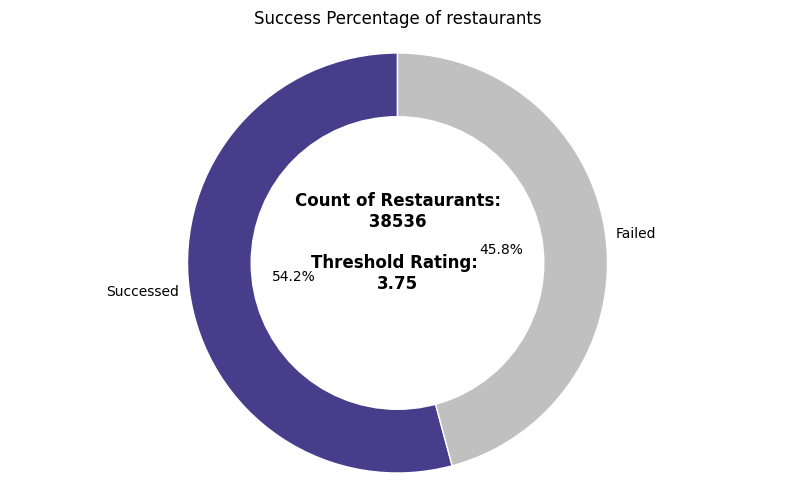

In [58]:
ax = donut_chart(df_2,'Success',['Successed','Failed'],['darkslateblue', 'silver'],'Success Percentage of restaurants',(10,6)
                 ,True,f'Count of Restaurants:\n {len(df_2)} \n\nThreshold Rating: \n{3.75}',0,0.1)

The Target variable is not totally balanced but it's **not considered to be imbalanced** So we will preceed without over or under sampling.

### **4.1.3 Feature Selection** ###

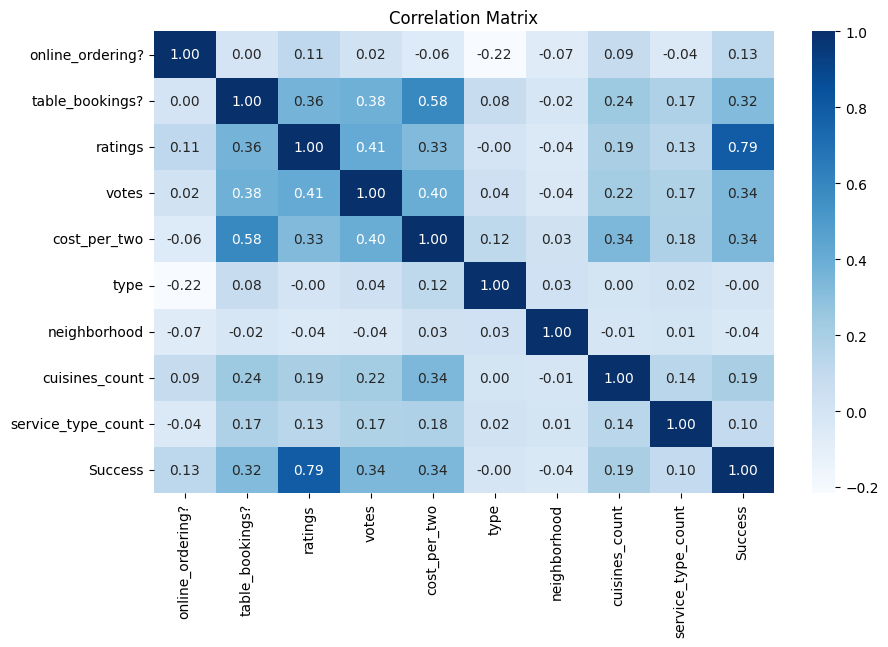

In [59]:
# Calculate the correlation matrix (CM) for the DataFrame df_2
CM = df_2.corr()
# Create a figure with a specified size (10 inches in width, 6 inches in height)
plt.figure(figsize=(10, 6))
# Create a heatmap of the correlation matrix with annotations
# using a blue color map (cmap) and formatting the values with two decimal places (fmt=".2f")
sns.heatmap(CM, annot=True, cmap='Blues', fmt=".2f")
# Set the title for the plot
plt.title('Correlation Matrix')
# Show the plot
plt.show()

In [60]:
X = df_2.drop(columns=['Success','ratings','online_ordering?','type','neighborhood'])
Y = df_2['Success']

In [61]:
print('X shape is: ',X.shape)
print('Y shape is: ',Y.shape)

X shape is:  (38536, 5)
Y shape is:  (38536,)


### **4.1.4 Feature Scaling** ###

In [62]:
X.head()

,table_bookings?,votes,cost_per_two,cuisines_count,service_type_count
0,1,775,800.0,3,1
1,0,787,800.0,3,1
2,0,918,800.0,3,2
3,0,88,300.0,2,1
4,0,166,600.0,2,1


In [63]:
# Import the StandardScaler module
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instance
SS = StandardScaler()
# Use the StandardScaler to scale the features in the DataFrame 'X' and store the scaled data in 'XScaled'
XScaled = pd.DataFrame(data=SS.fit_transform(X), columns=X.columns)
# Display the first few rows of the scaled data to examine the transformation
XScaled.head()

,table_bookings?,votes,cost_per_two,cuisines_count,service_type_count
0,2.801912,0.658109,0.993103,0.370750,-0.401774
1,-0.356899,0.674405,0.993103,0.370750,-0.401774
2,-0.356899,0.852306,0.993103,0.370750,2.488960
3,-0.356899,-0.274849,-0.738191,-0.412756,-0.401774
4,-0.356899,-0.168924,0.300586,-0.412756,-0.401774


## **4.2. Modeling** ##

#### Define Evaluation Functions ####

In [64]:
def Evaluation_Metrices(y_true, y_pred, train_test):
    # Print accuracy score for the given set (train or test)
    print(f'{train_test} Set Accuracy equals:', accuracy_score(y_true, y_pred))
    
    # Print precision score for the given set (train or test)
    print(f'{train_test} Set Precision equals:', precision_score(y_true, y_pred))
    
    # Print recall score for the given set (train or test)
    print(f'{train_test} Set Recall equals:', recall_score(y_true, y_pred))
    
    # Print F1-score for the given set (train or test)
    print(f'{train_test} Set F1_Score equals:', f1_score(y_true, y_pred))
    
    # Print ROC AUC score for the given set (train or test)
    print(f'{train_test} Set ROC_AUC equals:', roc_auc_score(y_true, y_pred))

In [65]:
def plot_roc_curves(classifier_dict, X_test, y_test):
    """
    Plots ROC curves for multiple classifiers in one plot.

    Parameters:
    classifier_dict (dict): A dictionary where keys are classifier names and values are fitted classifier models with best parameters.
    X_test (array-like): Test feature data.
    y_test (array-like): True labels for the test data.
    """

    plt.figure(figsize=(8, 6))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
    
    for clf_name, clf in classifier_dict.items():
        fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
        plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc="lower right")
    plt.show()
# Example usage:
# classifier_dict = {'Classifier1': clf1, 'Classifier2': clf2, 'Classifier3': clf3}
# plot_roc_curves(classifier_dict, X_test, y_test)

#### Splitting Data To train and test splits ####

In [66]:
random_seed = 42
x_train, x_test, y_train, y_test = train_test_split(XScaled, Y, test_size=0.3, random_state=random_seed,shuffle=True,stratify=Y)
print('x_train size:',x_train.shape)
print('y_train size:',y_train.shape)
print('x_test size:',x_test.shape)
print('x_test size:',y_test.shape)

x_train size: (26975, 5)
y_train size: (26975,)
x_test size: (11561, 5)
x_test size: (11561,)


In [67]:
# Define your machine learning algorithms
algorithms = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        'param_grid': {
                'bootstrap': [True, False],
                'max_depth': [3, 5, 10, 20, 50],
                'n_estimators': [50, 100, 200, 500],
                'max_features': ['auto', 'sqrt']
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'param_grid': {
                'n_neighbors': [3, 5, 7, 9],
                'weights': ['uniform', 'distance']
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(),
        'param_grid': {
                'C': np.linspace(0.1, 10, 20),
                'penalty': ['l1', 'l2'],
                'solver': ['liblinear']
        }
    },
     'Decision Trees': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
                'max_depth': [None, 10, 20, 30],  
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
        }
    }
}

In [68]:
best_models = {}
# Iterate through each algorithm and perform GridSearchCV
for algo_name, algo_info in algorithms.items():
    model = algo_info['model']
    param_grid = algo_info['param_grid']
    
    # Initialize GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=3)
    # Fit the model to the training data
    print(f'*********** Fitting {algo_name} ***********')
    grid_search.fit(x_train, y_train)
    # Save the best model for this algorithm
    best_models[algo_name] = grid_search.best_estimator_
    # Evaluate the best model's performance on the test set
    y_pred = grid_search.predict(x_test)
    Evaluation_Metrices(y_test, y_pred, 'Test')
    print(f'*******************************************')
# Now we have the best models for each algorithm in the `best_models` dictionary.
# You can use these models for predictions or further analysis.

*********** Fitting Random Forest ***********
Fitting 3 folds for each of 80 candidates, totalling 240 fits
Test Set Accuracy equals: 0.9136752876048785
Test Set Precision equals: 0.9250395569620253
Test Set Recall equals: 0.883119335347432
Test Set F1_Score equals: 0.9035935085007729
Test Set ROC_AUC equals: 0.9113122614486562
*******************************************
*********** Fitting K-Nearest Neighbors ***********
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Test Set Accuracy equals: 0.9129833059423925
Test Set Precision equals: 0.9204233633869071
Test Set Recall equals: 0.8867069486404834
Test Set F1_Score equals: 0.9032506251202154
Test Set ROC_AUC equals: 0.91095123968337
*******************************************
*********** Fitting Logistic Regression ***********
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Test Set Accuracy equals: 0.7592768791627021
Test Set Precision equals: 0.8293577981651377
Test Set Recall equals: 0.5974320241691843
T

## **4.3. Evaluation** ##

In [91]:
def plot_clustered_barchart_metrics(metrics_dict, title):
    labels = list(metrics_dict.keys())
    metrics = list(metrics_dict.values())
    num_metrics = len(metrics)

    accuracy = [round(metric['accuracy'], 2) for metric in metrics]
    precision = [round(metric['precision'], 2) for metric in metrics]
    recall = [round(metric['recall'], 2) for metric in metrics]
    f1_score = [round(metric['f1_score'], 2) for metric in metrics]

    x = np.arange(len(labels))
    width = 0.2  # Width of each bar

    fig, ax = plt.subplots(figsize=(12, 6))
    cmap = plt.get_cmap('magma', num_metrics)

    bars_accuracy = ax.bar(x - 1.5 * width, accuracy, width, label='Accuracy', color=cmap(0))
    bars_precision = ax.bar(x - 0.5 * width, precision, width, label='Precision', color=cmap(0.3))
    bars_recall = ax.bar(x + 0.5 * width, recall, width, label='Recall', color=cmap(0.6))
    bars_f1_score = ax.bar(x + 1.5 * width, f1_score, width, label='F1 Score', color=cmap(0.9))

    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45)
    
    def add_values(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height*100}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    add_values(bars_accuracy)
    add_values(bars_precision)
    add_values(bars_recall)
    add_values(bars_f1_score)

    # Move the legend outside of the plot
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()

In [92]:
metrics_dict = {
     'Random Forest': {
         'accuracy': 0.9136752876048785,
         'precision': 0.9250395569620253,
         'recall': 0.883119335347432,
         'f1_score': 0.9035935085007729
     },
     'K-Nearest Neighbors': {
         'accuracy': 0.9129833059423925,
         'precision': 0.9204233633869071,
         'recall': 0.8867069486404834,
         'f1_score': 0.91095123968337
     },
    'Logistic Regression': {
         'accuracy': 0.7592768791627021,
         'precision': 0.8293577981651377,
         'recall': 0.5974320241691843,
         'f1_score': 0.6945450554275053
     },
        'Decision Trees': {
         'accuracy': 0.9086584205518554,
        'precision': 0.9223107569721115,
         'recall': 0.8742447129909365,
        'f1_score': 0.9059970572137444
    }
 }


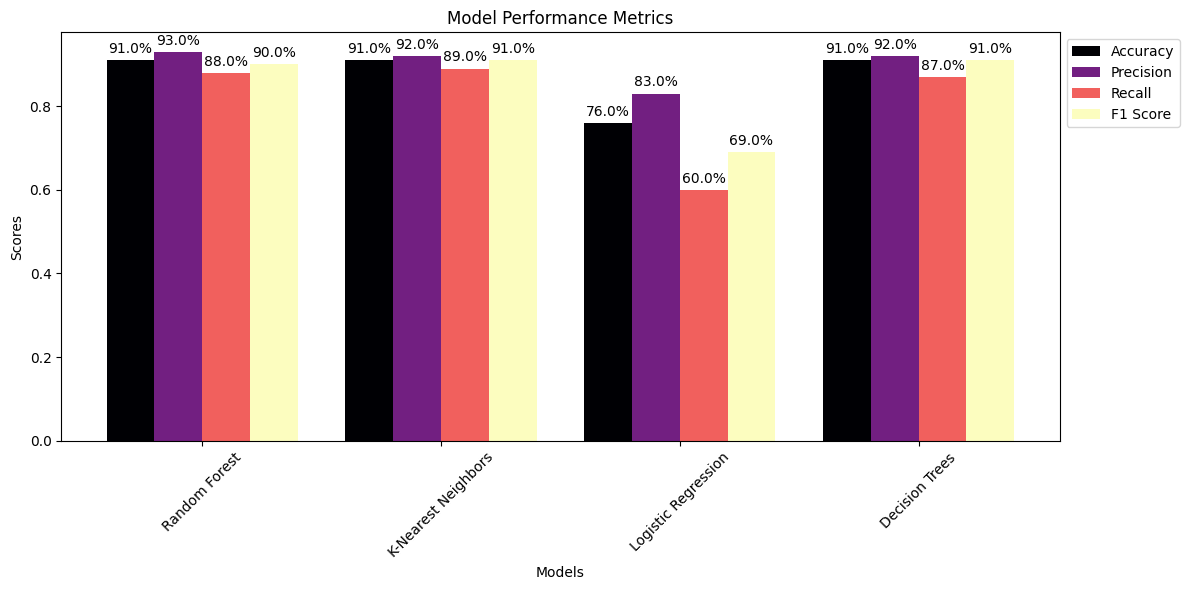

In [93]:
# Call the function to plot the clustered bar chart
plot_clustered_barchart_metrics(metrics_dict, 'Model Performance Metrics')

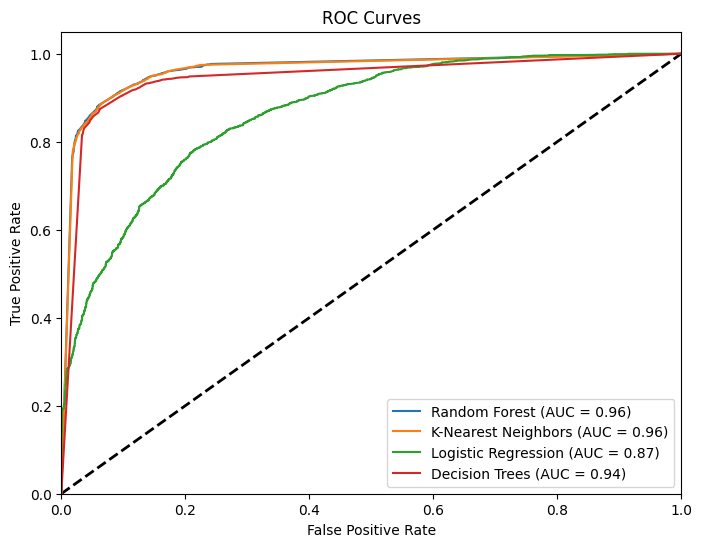

In [69]:
plot_roc_curves(best_models, x_test, y_test)

In [70]:
# Access the desired classifier from the dictionary for further analysis
clf = best_models['Random Forest']

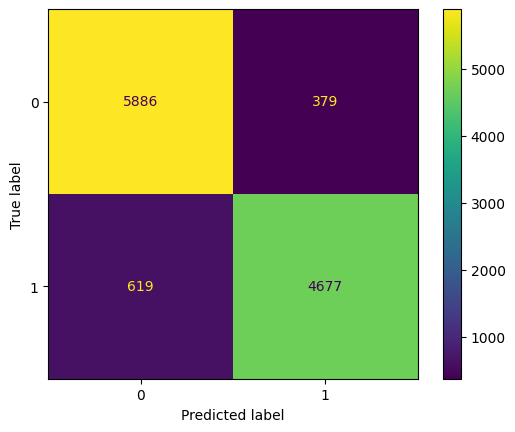

In [71]:
CMF = confusion_matrix(y_test,clf.predict(x_test))
CMF_Display = ConfusionMatrixDisplay(CMF)
CMF_Display.plot()
plt.show()

As shown in the confusion matrix the **classifier** have done a quite **good job**, predicted only 1,029 out of 11,561 **(about 9%) false prediction** in which **589** predicted as **not successful** restaurants and they were **successful** and **440** predicted as **successful** and they were actually a **failling restaurants**.

# **5. Interpretation** #

In [72]:
# Create a DataFrame to store feature names and their importance scores
Feature_Importance = pd.DataFrame(data={'Feature': clf.feature_names_in_, 'Importance': clf.feature_importances_})
# Sort the DataFrame in descending order based on feature importance
Feature_Importance.sort_values(by='Importance', ascending=False, inplace=True)

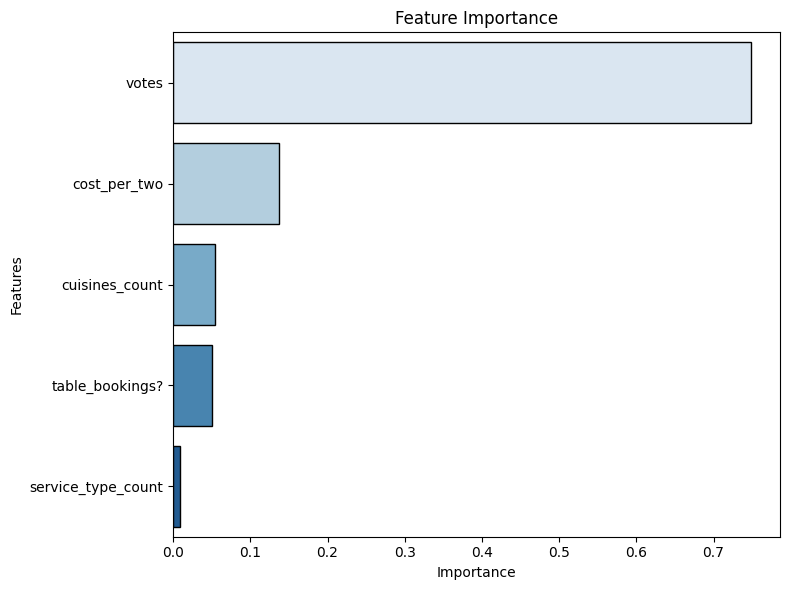

In [73]:
bar_plot_annot(Feature_Importance,y_='Feature',x_='Importance',barh=True,color_palette='Blues',x_shift=0,y_shift=0,figsize_=(8, 6),
               title_='Feature Importance',xlabel_='Importance',ylabel_='Features',rot_=0,annotate=False,annot_is_perc=False,univariate=False)

**Votes** is appeared to be the **most important feature** that the model considered when determining if the **restaurant is a successful or not** which is fairly reasonable, so now we have to focus on which **features causes increasing in votes** thus increase probability of succession of restaurants.

In [74]:
# Calculate the correlation matrix
correlation_votes = pd.DataFrame(data={'Feature':df_2.corr()['votes'].index,'Correlation with votes':df_2.corr()['votes'].values})       
correlation_votes = correlation_votes.sort_values(by='Correlation with votes',ascending=False)
correlation_votes = correlation_votes[~correlation_votes['Feature'].isin(['Success', 'votes'])].reset_index(drop=True)
correlation_votes

,Feature,Correlation with votes
0,ratings,0.414176
1,cost_per_two,0.398834
2,table_bookings?,0.378473
3,cuisines_count,0.219866
4,service_type_count,0.170805
5,type,0.037275
6,online_ordering?,0.018374
7,neighborhood,-0.036898


The variable **"ratings"** exhibits the **highest degree of correlation** with the number of votes. Consequently, it becomes imperative to analyze the **interrelationship** between **rating**s and **other variables**, discerning the impact of each variable on ratings. This comprehensive analysis aids in identifying critical factors that demand attention in the pursuit of optimizing restaurant success.

In [75]:
# Calculate the correlation matrix
correlation_ratings = pd.DataFrame(data={'Feature':df_2.corr()['ratings'].index,'Correlation with Ratings':df_2.corr()['ratings'].values})       
correlation_ratings = correlation_ratings.sort_values(by='Correlation with Ratings',ascending=False)
# Filter out rows where 'Feature' is 'Success', 'ratings', or 'votes'
correlation_ratings = correlation_ratings[~correlation_ratings['Feature'].isin(['Success', 'ratings', 'votes'])].reset_index(drop=True)
correlation_ratings

,Feature,Correlation with Ratings
0,table_bookings?,0.359305
1,cost_per_two,0.326394
2,cuisines_count,0.193550
3,service_type_count,0.132277
4,online_ordering?,0.113117
5,type,-0.002411
6,neighborhood,-0.042510


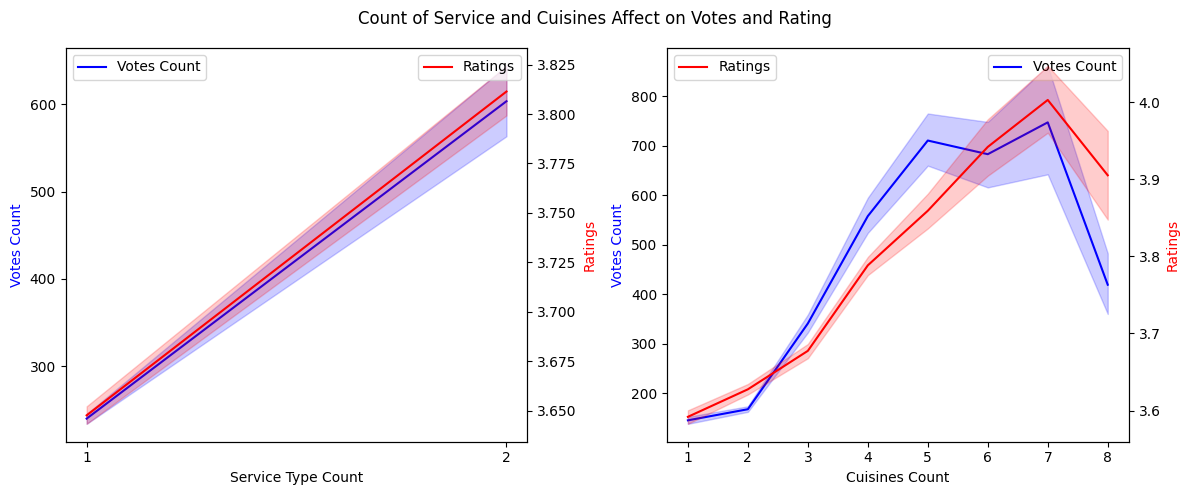

In [76]:
# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Plot the first line plot (Votes Count vs. Service Type Count) on the first subplot (axes[0])
sns.lineplot(data=df_2, x='service_type_count', y='votes', ax=axes[0], label='Votes Count', color='blue')
axes[0].set_ylabel('Votes Count', color='blue')
# Customize the x-axis ticks and labels for the first subplot
xticks = [x for x in range(0,5)]
axes[0].set_xticks(xticks)
axes[0].set_xlabel('Service Type Count')
# Create a secondary y-axis on the first subplot for the second line plot (Ratings vs. Service Type Count)
ax2_1 = axes[0].twinx()
sns.lineplot(data=df_2, x='service_type_count', y='ratings', ax=ax2_1, label='Ratings', color='red')
ax2_1.set_ylabel('Ratings', color='red')
# Add the legend for the first subplot in the upper left corner
axes[0].legend(loc='upper left')
# Plot the second line plot (Votes Count vs. Cuisines Count) on the second subplot (axes[1])
sns.lineplot(data=df_2, x='cuisines_count', y='votes', ax=axes[1], label='Votes Count', color='blue')
axes[1].set_xlabel('Cuisines Count')
axes[1].set_ylabel('Votes Count', color='blue')
# Create a secondary y-axis on the second subplot for the second line plot (Ratings vs. Cuisines Count)
ax2_2 = axes[1].twinx()
sns.lineplot(data=df_2, x='cuisines_count', y='ratings', ax=ax2_2, label='Ratings', color='red')
ax2_2.set_ylabel('Ratings', color='red')
# Add the legend for the second subplot in the upper right corner
axes[1].legend(loc='upper right')
ax2_2.legend(loc='upper left')
# Set the title for the entire plot
fig.suptitle('Count of Service and Cuisines Affect on Votes and Rating')
plt.tight_layout()
# Display the plot
plt.show()

As we see on the above plots, **Increasing number of services** that restaurant offer **increases reviews** that restaurant takes and **average rating** of the restaurant.
While **Increasing number of cuisines** that restaurant specialized in **increases reviews and ratings** untill **some point** in which it **doesn't matter** how many cuisines the restaurant offer the reviews and rating **keep going down**.

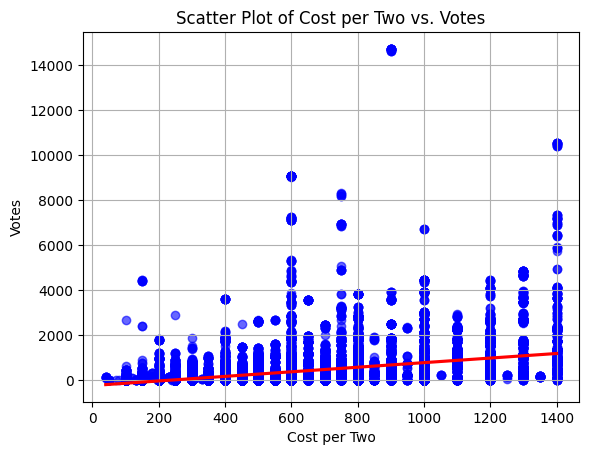

In [77]:
# Plot on the second subplot (axes[1]) - Scatter plot with regression line
sns.regplot(x='cost_per_two', y='votes', data=df_2, scatter_kws={'color': 'blue', 'alpha': 0.6}, line_kws={'color': 'red'})

# Add title and labels for the second subplot
plt.title('Scatter Plot of Cost per Two vs. Votes')
plt.xlabel('Cost per Two')
plt.ylabel('Votes')

# Add gridlines for better visualization (optional)
plt.grid(True)

The relation of **cost and number of reviews** is a little bit **vague**, but suggests that restaurants with **medium to high cost per two persons** tends to have **higher number of votes** than those ones with low cost per two persons.

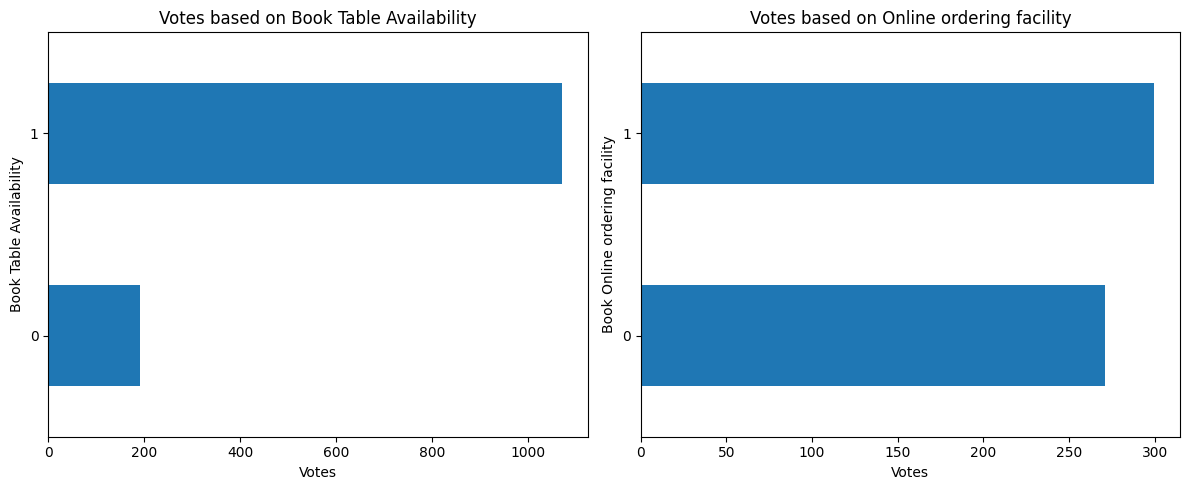

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Plot on the first subplot (axes[0]) - Bar plot
df_2.groupby(['table_bookings?'])[['votes']].mean().plot(kind='barh', ax=axes[0], legend=False)
axes[0].set_title('Votes based on Book Table Availability')
axes[0].set_xlabel('Votes')
axes[0].set_ylabel('Book Table Availability')
df_2.groupby(['online_ordering?'])[['votes']].mean().plot(kind='barh', ax=axes[1], legend=False)
axes[1].set_title('Votes based on Online ordering facility')
axes[1].set_xlabel('Votes')
axes[1].set_ylabel('Book Online ordering facility')
# Adjust layout
plt.tight_layout()
# Show the figure with subplots
plt.show()

Having The facility of **Booking a table** or **order online** **increases the reviews** the restaurants takes which increases possibility of getting **good ratings**.

In [94]:
import joblib
# Save the model to a file
joblib.dump(clf, 'Random_Forest_With_Votes.joblib')

['Random_Forest_With_Votes.joblib']